In [89]:
import math
import matplotlib.pyplot as plt
import random

Средняя линия по интервалам:

In [90]:
def Sred_lin(a, interval):
    len_arr = len(a)
    otv = []
    n = 2 * interval + 1
    for index in range(interval, len_arr - interval):
        Sum = 0
        for i in range(index - interval, index +  interval + 1):  # interval
            Sum += a[i]
        Sum = Sum / n
        otv.append(Sum)
    return otv

Склеиваем массивы:

In [91]:
def skleika(a, size, dop):
    if a == []:
        return []
    first = dop + a
    otv = Sred_lin(first, size)
    return otv

In [92]:
def Rnd(Min=0, Max=30, kolvo=30, minus="off"):
    data = []
    for i in range(kolvo):
        data.append(random.randint(Min, Max))
    return data

Дискретизация (считает сред линию дискретно):

In [93]:
def diskretsred(data, prom, diskret):
    kolvo = round(prom / diskret)
    otv = []
    i = 0
    while i + kolvo <= len(data):
        summa = 0
        for elem in data[i: i + kolvo]:
            summa += elem
        summa /= kolvo
        i += 1
        otv.append(summa)
    return otv


In [94]:
data = Rnd()
prom = 1
disk = 0.23
otv_sred = Sred_lin(data, 2)
otv_sreddisk = diskretsred(data, prom, disk)
start_sred_disk = math.ceil(prom / (2 * disk)) - 1
#ceil  -  округление
#plt.figure(figsize=(15, 10))
#plt.axvline(start_sred_disk, c="orange")
# plt.subplot(221)
#plt.plot(data, c="black")
#plt.plot(range(2, len(data) - 2), otv_sred)
# plt.subplot(222)
# plt.plot(data)
#plt.plot(range(start_sred_disk, len(otv_sreddisk) + start_sred_disk), otv_sreddisk, c="red")

# Линейная интерполяция


In [95]:
#Уравнение прямой по двум заданным точкам
def LinearChange(x1, y1, x2, y2, x):
    y = []
    for elem in x:
        y.append((y2 - y1) * (elem - x1) / (x2 - x1) + y1)
    return y
#Линейная интерполяция
def LineInt(data):
    otv = []
    i = 0
    while i < len(data):
        if data[i] == -100:
            x = []
            x1 = i - 1
            y1 = data[x1]
            while data[i] == -100:
                x.append(i)
                i += 1
            x2 = i
            y2 = data[i]
            otv += LinearChange(x1, y1, x2, y2, x)
        else:
            otv.append(data[i])
            i += 1
    return otv

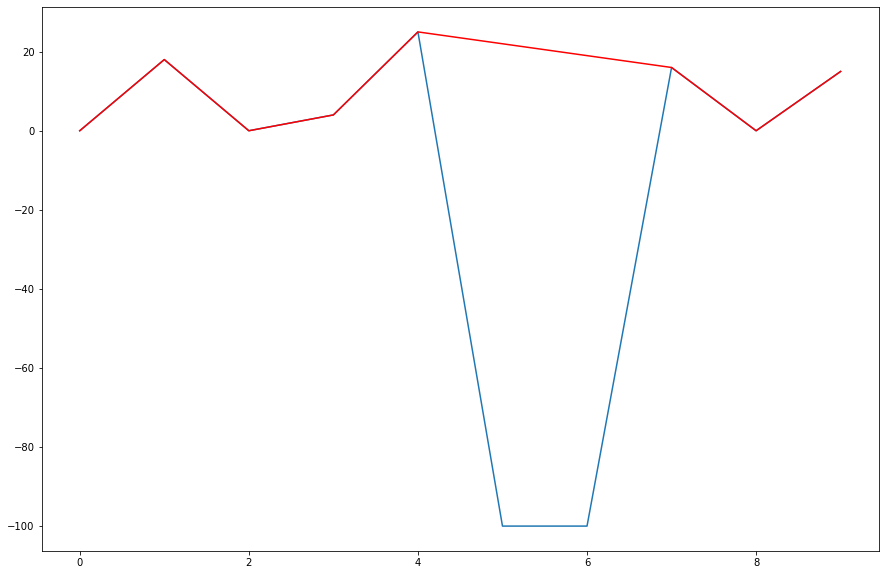

In [96]:
#LinearChange(0, 0, 10, 10, [1, 2, 3, 4, 5, 6, 7, 8, 9])
data = Rnd(0, 30, 10)
for i in range(5, 7):
    data[i] = -100
otv = LineInt(data)
plt.figure(figsize=(15, 10))
plt.plot(data)
plt.plot(otv, c="red")
#Генерируем массив, некоторым присвоили -10 и проверяем лин интерполяцию

# Квадратичная интерполяция

In [97]:
#Проверка данных
def check_data(nodes, values):
    # Проверка входных данных на тип list
    if type(nodes) is not list or type(values) is not list:
        return "Incorrect type of data!!!"
    if len(nodes) != 3 or len(nodes) != len(values):
        return "Data is not complete!!!"
    # Проверка типа узлов
    for elem in nodes:
        if type(elem) is not int and type(elem) is not float:
            return "Incorrect type of nodes data!!!"
    for elem in values:
        if type(elem) is not int and type(elem) is not float:
            return "Incorrect type of values data!!!"
    # Узлы должны быть в порядке возрастания
    if nodes != sorted(nodes):
        return "Nodes order is incorrect!!!"
    return 0

In [98]:
#Рисуем параболу 
def QuadInt_simple(nodes, values, N=3):
    if N < 3:
        return "Incorrect count N !!!"
    check = check_data(nodes, values)
    if check != 0:
        return check
    x_coords = [nodes[0] + i * (nodes[2] - nodes[0]) / (N - 1) for i in range(N)]
    y_coords = []
    for coord in x_coords:
        sum_0 = values[0] * (coord - nodes[1]) * (coord - nodes[2]) / ((nodes[0] - nodes[1]) * (nodes[0] - nodes[2]))
        sum_1 = values[1] * (coord - nodes[0]) * (coord - nodes[2]) / ((nodes[1] - nodes[0]) * (nodes[1] - nodes[2]))
        sum_2 = values[2] * (coord - nodes[0]) * (coord - nodes[1]) / ((nodes[2] - nodes[0]) * (nodes[2] - nodes[1]))
        y_coords.append(sum_0 + sum_1 + sum_2)
    return x_coords, y_coords
#Подставляет значения в уравнении параболы -> получим точки 
def QuadInt_coords(nodes, values, x_coords):
    if type(x_coords) is not list:
        return "Incorrect type of data!!!"
    for elem in x_coords:
        if type(elem) is not int and type(elem) is not float:
            return "Incorrect type of x_coords data!!!"
    check = check_data(nodes, values)
    if check != 0:
        return check
    y_coords = []
    for coord in x_coords:
        sum_0 = values[0] * (coord - nodes[1]) * (coord - nodes[2]) / ((nodes[0] - nodes[1]) * (nodes[0] - nodes[2]))
        sum_1 = values[1] * (coord - nodes[0]) * (coord - nodes[2]) / ((nodes[1] - nodes[0]) * (nodes[1] - nodes[2]))
        sum_2 = values[2] * (coord - nodes[0]) * (coord - nodes[1]) / ((nodes[2] - nodes[0]) * (nodes[2] - nodes[1]))
        y_coords.append(sum_0 + sum_1 + sum_2)
    return y_coords


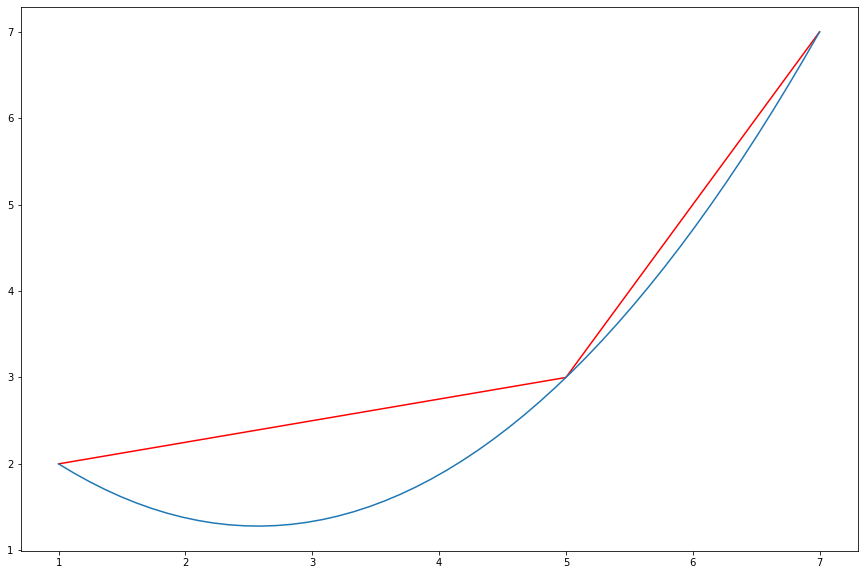

In [99]:
values = [2, 3, 7]


nodes = [1, 5, 7]

n = 50
x_coords = [3, 4, 5]
quad_simple = QuadInt_simple(nodes, values, N=n)
plt.figure(figsize=(15, 10))
plt.plot(nodes, values, c="red")
plt.plot(quad_simple[0], quad_simple[1])

Квадратичная интерполяция:

In [100]:
def QuadInt(data, Flag=-1):
    otv = []
    l_data = len(data)

    nodes = [0, 0, -1]
    values = [0, 0, -1]

    if Flag == 1:  # нужно разобрать случай
        i = l_data - 1  # последний эл
        if data[-1] == -100:
            return "Неверный тип "
        elif data[-2] == -100:
            x_coords = []
            otv.append(data[i])
            x1 = i
            y1 = data[i]
            i -= 1
            while data[i] == -100:
                x_coords.append(i)
                i -= 1
            x2 = i
            y2 = data[i]
            otv += LinearChange(x1, y1, x2, y2, x_coords)

        while i >= 0:
            if data[i] == -100:
                x_coords = []
                nodes[2] = i + 2
                nodes[1] = i + 1
                values[2] = otv[l_data - i - 1 - 2]
                values[1] = otv[l_data - i - 1 - 1]
                while data[i] == -100:
                    x_coords.append(i)
                    i -= 1
                nodes[0] = i
                values[0] = data[i]

                otv += QuadInt_coords(nodes, values, x_coords)
            else:
                otv.append(data[i])
                i -= 1

        otv_1 = otv[-1::-1]
        return otv_1

    else:
        i = 0
        if (data[0] == -100):
            return "ERROR first elem is empty "
        elif data[1] == -100:
            otv.append(data[0])
            x_coords = []
            x1 = 0
            y1 = data[0]
            i = 1
            while data[i] == -100:
                x_coords.append(i)
                i += 1
            x2 = i
            y2 = data[i]
            otv += LinearChange(x1, y1, x2, y2, x_coords)

        while i < l_data:
            if data[i] == -100:
                x_coords = []
                nodes[0] = i - 2
                nodes[1] = i - 1
                values[0] = otv[i - 2]
                values[1] = otv[i - 1]
                while data[i] == -100:
                    x_coords.append(i)
                    i += 1
                nodes[2] = i
                values[2] = data[i]

                otv += QuadInt_coords(nodes, values, x_coords)

            else:
                otv.append(data[i])
                i += 1

    return otv

# # Экстраполяция

In [101]:
def InterP(data, interpolatin="linear", flag=-1):
    if interpolatin == "linear":
        return LineInt(data)
    elif interpolatin == "quadratic":
        return QuadInt(data, Flag=flag)

#?-1 left 1 right

#Экстраполяция

def extraP(data, kolvo, extrapolation="const", flag="all"):
    l_data = len(data)
    otv = []

    i = 0
    j = 0

    kol = kolvo // 2

    if extrapolation == "const":

        if flag == "first" or flag == "all":
            while i < kol:
                otv.append(data[0])
                i += 1

        for k in range(l_data):
            otv.append(data[k])

        if flag == "last" or flag == "all":
            while j < kolvo - i - 1:
                otv.append(data[-1])
                j += 1

        return otv

    elif extrapolation == "symmetric":

        if flag == "first" or flag == "all":
            while i < kol:
                otv.append(data[kol - i])
                i += 1

        for k in range(l_data):
            otv.append(data[k])

        if flag == "last" or flag == "all":
            while j < kolvo - i - 1:
                otv.append(data[-2 - j])
                j += 1

        return otv

    elif extrapolation == "asymmetric":

        if flag == "first" or flag == "all":
            while i < kol:
                dop = LinearChange(0, data[0], (kol - i), data[kol - i], [i - kol])  # def LinearChange(x1,y1,x2,y2,x):
                dop[0] = int(dop[0])
                otv += dop
                i += 1

        for k in range(l_data):
            otv.append(data[k])

        if flag == "last" or flag == "all":
            while j < kolvo - i - 1:
                dop = LinearChange((l_data - 1), data[-1], (l_data - 2 - j), data[-2 - j], [l_data + j])
                dop[0] = int(dop[0])
                otv += dop
                j += 1

        return otv

    elif extrapolation == "periodic":

        if flag == "first" or flag == "all":
            while i < kol:
                otv.append(data[i - kol])
                i += 1

        for k in range(l_data):
            otv.append(data[k])

        if flag == "last" or flag == "all":
            while j < kolvo - i - 1:
                otv.append(data[j])
                j += 1

        return otv
    else:
        return "Error " + extrapolation

Проверка экстраполяции

In [102]:

data = Rnd(0, 30, 20)
# print(data)


# prom = 3.0
# diskret = 1.0
#
# kolvo = round(prom / diskret)

# constExtraP = extraP(data, kolvo, extrapolation="const")
# symmetricExtraP = extraP(data, kolvo, extrapolation="symmetric")
# asymmetricExtraP = extraP(data, kolvo, extrapolation="asymmetric")
# periodicExtraP = extraP(data, kolvo, extrapolation="periodic")

# print("kolvo - ", kolvo, "\tLeft - ", kolvo // 2, "\tRight - ", kolvo - 1 - kolvo // 2)
# print("data      \t", data)
# print("const     \t", constExtraP)
# print("symmetric \t", symmetricExtraP)
# print("asymmetric\t", asymmetricExtraP)
# print("periodic  \t", periodicExtraP)


# constSredDiskExp = diskretsred(constExtraP, prom, diskret)
# symmetSredDiskExp = diskretsred(symmetricExtraP, prom, diskret)
# AsymmetSredDiskExp = diskretsred(asymmetricExtraP, prom, diskret)
# periodicSredDiskExp = diskretsred(periodicExtraP, prom, diskret)

#plt.figure(figsize=(15, 10))
#
# #plt.subplot(221)
# #plt.title("CONST")
# plt.plot(data)
# plt.plot(constSredDiskExp)
#
# plt.subplot(222)
# plt.title("SYMMETRIC")
# plt.plot(data)
# plt.plot(symmetSredDiskExp)
#
# # plt.subplot(223)
# # plt.title("ASYMMETRIC")
# # plt.plot(data)
# # plt.plot(AsymmetSredDiskExp)
#
# plt.subplot(224)
# plt.title("PERIODIC")
# plt.plot(data)
# plt.plot(periodicSredDiskExp)


print("aaaaa",data)

aaaaa [14, 8, 26, 7, 20, 0, 17, 18, 12, 22, 9, 11, 11, 21, 3, 27, 25, 19, 27, 7]


# Реализация оффлайн

In [108]:
def offline(data, prom=1, disk=0.25, interpol="linear", FlagI=-1, extrapol="const"):
    if type(data) is not list:
        return "Incorrect type of data!!!"


    kolvo = round(prom / disk)

    dop = InterP(data, interpolatin=interpol, flag=FlagI)
    dop = extraP(dop, kolvo, extrapolation=extrapol, flag="all")

    otv = diskretsred(dop, prom, disk)

    plt.figure(figsize=(15, 10))

    plt.title(interpol + " " + extrapol)
    plt.plot(data, c="red")
    plt.plot(otv)
    plt.show()
    return otv

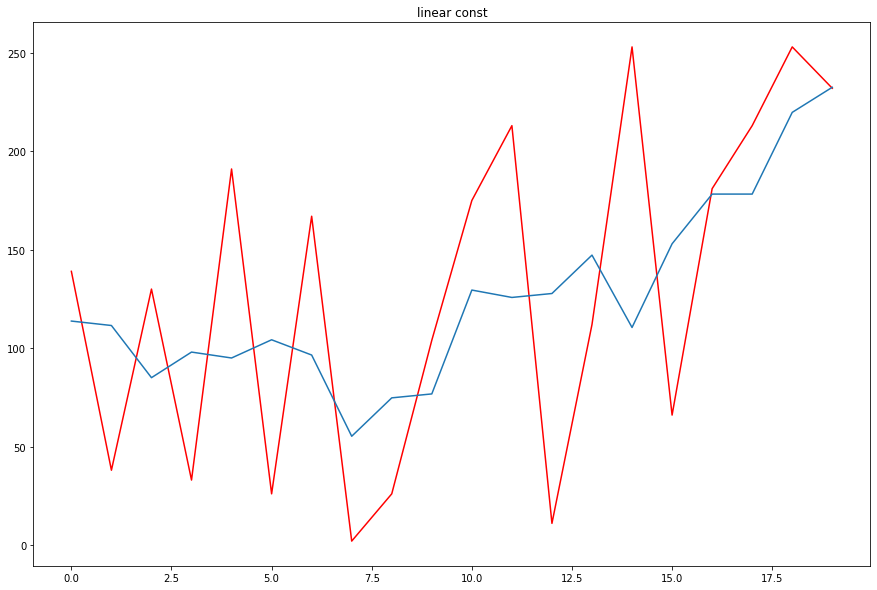

[139, 38, 130, 33, 191, 26, 167, 2, 26, 104, 175, 213, 11, 112, 253, 66, 181, 213, 253, 232]


In [109]:
data = Rnd(Min=0, Max=255, kolvo=20)
prom = 1.5
disk = 0.4
a = offline(data,prom,disk,interpol="linear", FlagI=-1, extrapol="const")
print(data)


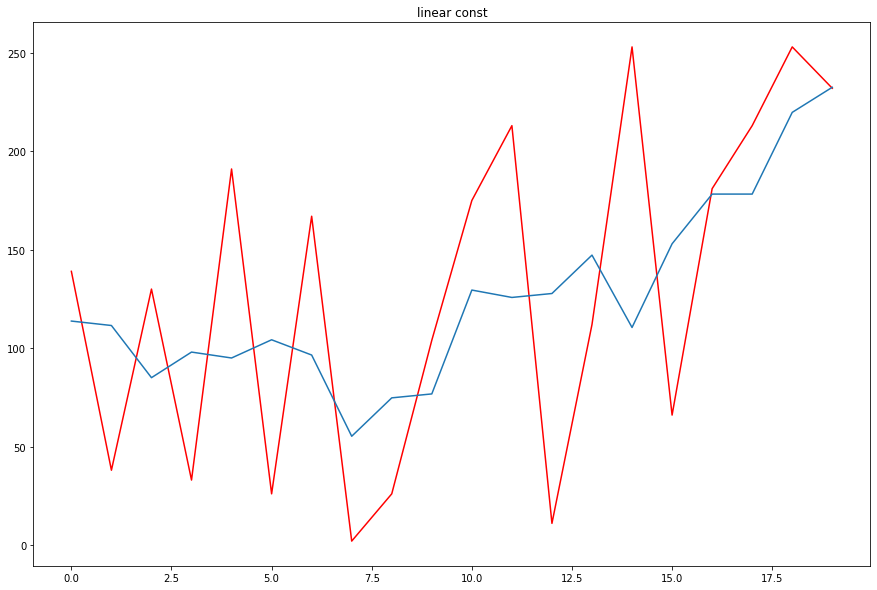

[139, 38, 130, 33, 191, 26, 167, 2, 26, 104, 175, 213, 11, 112, 253, 66, 181, 213, 253, 232]


In [110]:
a = offline(data,interpol="linear", FlagI=-1, extrapol="const")
print(data)

Метод наименьших квадратов

In [49]:
def least_square_method(data, nodes):
    l_data = len(data)
    l_nodes = len(nodes)

    if l_data != l_nodes:
        print("len(data) != len(nodes) ?????")
        return -1
    S_x = 0
    S_y = 0
    S_xx = 0
    S_xy = 0
    for i in nodes:
        S_x += i
    for i in data:
        S_y += i
    for i in nodes:
        S_xx += i * i
    for i in range(l_data):
        S_xy += data[i] * nodes[i]

    a = (S_x * S_y - l_data * S_xy) / (S_x * S_x - l_data * S_xx)
    b = S_y / l_data - a * S_x / l_nodes
    return a, b

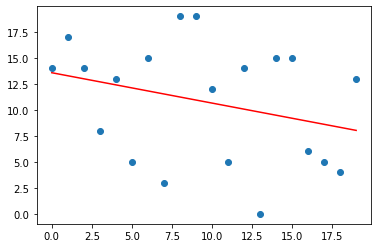

In [50]:
len_otr = 20
nodes = []
data = Rnd(0, 20, len_otr)
for j in range(len_otr):
    nodes.append(j)
#print(data, "\n", nodes)
lineurv = least_square_method(data, nodes)
y0 = lineurv[0] * nodes[0] + lineurv[1]
y1 = lineurv[0] * nodes[-1] + lineurv[1]
line = LinearChange(nodes[0], y0, nodes[-1], y1, nodes)
plt.scatter(list(range(len(data))), data)

plt.plot(range(len(line)), line, c="r")
plt.show()

In [78]:
data = []
with open("road.txt") as f:
    for line in f:
        data.append(int(line))

In [79]:
print(data)

[180, 180, 180, 180, 180, 180, 190, 190, 190, 190, 190, 180, 180, 180, 170, 160, 150, 140, 130, 120, 100, 90, 70, 50, 40, 20, 10, 0, -10, -20, -30, -40, -40, -40, -40, -30, -20, -10, 0, 10, 20, 40, 70, 90, 110, 130, 160, 180, 200, 220, 240, 260, 280, 290, 310, 320, 330, 340, 350, 350, 360, 360, 360, 360, 360, 360, 350, 350, 350, 340, 330, 320, 310, 300, 290, 280, 260, 240, 220, 200, 180, 160, 140, 110, 80, 60, 30, 0, -20, -50, -80, -100, -130, -150, -170, -190, -210, -230, -240, -250, -260, -260, -270, -270, -280, -280, -280, -280, -290, -290, -300, -300, -310, -320, -320, -330, -340, -350, -360, -370, -380, -390, -400, -410, -410, -420, -420, -420, -420, -410, -410, -400, -400, -390, -380, -370, -360, -350, -330, -320, -310, -300, -290, -280, -270, -250, -240, -230, -221, -210, -200, -180, -170, -150, -140, -120, -111, -90, -70, -60, -40, -20, -10, 0, 10, 20, 30, 40, 40, 50, 50, 50, 50, 50, 50, 50, 40, 40, 40, 30, 30, 30, 30, 30, 30, 40, 40, 40, 50, 50, 50, 50, 50, 50, 50, 40, 40, 30,

In [80]:
def Division(data,kolichestvo):

    if len(data) % kolichestvo != 0:
        kolvo_spiskov = (len(data) // kolichestvo) + 1
    else:
        kolvo_spiskov = (len(data) // kolichestvo)

    otv = []

    for k in range(kolvo_spiskov):
        otv.append(data[k * kolichestvo : (k+1) * kolichestvo])

    return otv

In [69]:
kolichestvo = 5
div = Division(data, kolichestvo)
print(div)

[[180, 180, 180, 180, 180], [180, 190, 190, 190, 190], [190, 180, 180, 180, 170], [160, 150, 140, 130, 120], [100, 90, 70, 50, 40], [20, 10, 0, -10, -20], [-30, -40, -40, -40, -40], [-30, -20, -10, 0, 10], [20, 40, 70, 90, 110], [130, 160, 180, 200, 220], [240, 260, 280, 290, 310], [320, 330, 340, 350, 350], [360, 360, 360, 360, 360], [360, 350, 350, 350, 340], [330, 320, 310, 300, 290], [280, 260, 240, 220, 200], [180, 160, 140, 110, 80], [60, 30, 0, -20, -50], [-80, -100, -130, -150, -170], [-190, -210, -230, -240, -250], [-260, -260, -270, -270, -280], [-280, -280, -280, -290, -290], [-300, -300, -310, -320, -320], [-330, -340, -350, -360, -370], [-380, -390, -400, -410, -410], [-420, -420, -420, -420, -410], [-410, -400, -400, -390, -380], [-370, -360, -350, -330, -320], [-310, -300, -290, -280, -270], [-250, -240, -230, -221, -210], [-200, -180, -170, -150, -140], [-120, -111, -90, -70, -60], [-40, -20, -10, 0, 10], [20, 30, 40, 40, 50], [50, 50, 50, 50, 50], [50, 40, 40, 40, 30],

In [87]:
#otv = LineInt(data)
#plt.figure(figsize=(100, 100))
#plt.plot(data)
#plt.plot(otv, c="red")

функция , 2 списка 
в одном - точное решение , в другом приближенное 
мы оцениваем погрешность
погрешность по л макс 


5 8    12 1 - элементы точного решения
4 8,5  16 -3 - приближенное 
максимум = 4
        
